In [3]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import root_mean_squared_error

In [4]:
# import the data and  drop no longer needed columns 
video_df = pd.read_csv("data/videos_prepared.csv")

remove_columns = ["video_id", "title", "channel_title"]
video_df.drop(columns=remove_columns, inplace=True)
video_df.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_year,term_years,term_youtu,term_youtube,log_view_count,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,0,0,6,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.243155,7.828038,11.927885,7.384610,5.752573,3.555348,9.976612
1,0,20,4,4,1,0,0,0,0,0,...,0.0,0.237726,0.0,0.063338,7.350516,12.850665,8.366603,5.389072,8.147288,11.965177
2,0,18,3,10,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,7.446001,14.875077,8.767329,6.741701,3.951244,13.871269
3,0,19,0,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,5.937536,10.890628,6.786717,4.867534,4.955827,5.325074
4,1,20,2,10,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,12.229037,17.917472,13.030250,5.940171,6.678342,6.431228


In [5]:
# split into features and target variable

X = video_df.drop(columns="log_view_count")
y = video_df["log_view_count"]

# split into training and test data
SEED = 666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_www,term_year,term_years,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
691,0,19,1,4,1,0,1,0,0,0,...,0.192941,0.0,0.0,0.129062,0.000000,17.608917,12.055256,7.196687,7.220374,9.505998
453,0,7,5,2,1,0,0,0,0,0,...,0.087819,0.0,0.0,0.000000,0.000000,10.013642,5.420535,4.488636,8.782169,8.391942
451,0,11,1,7,1,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.000000,16.309203,10.214679,5.375278,3.178054,3.141381
67,0,20,2,9,1,0,0,1,0,0,...,0.196466,0.0,0.0,0.000000,0.090057,17.445774,12.641100,7.347300,5.463832,7.453040
311,0,17,3,2,1,0,0,0,0,0,...,0.155924,0.0,0.0,0.032594,0.053605,18.167549,13.355063,7.236339,7.712444,13.838275


In [6]:
# instantiate the scaler, fit it to training data and transform training and test features
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train_scaled

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_www,term_year,term_years,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,-0.348155,0.734129,-0.938201,-0.585734,0.291336,-0.084636,3.466774,-0.465041,-0.100287,-0.037743,...,0.832198,-0.169461,-0.200734,1.204619,-0.559974,0.625328,0.532030,0.725654,0.852687,0.233410
1,-0.348155,-1.155744,1.089640,-1.158833,0.291336,-0.084636,-0.288453,-0.465041,-0.100287,-0.037743,...,-0.103418,-0.169461,-0.200734,-0.439311,-0.559974,-1.966348,-1.826654,-1.193153,1.767023,-0.071872
2,-0.348155,-0.525786,-0.938201,0.273913,0.291336,-0.084636,-0.288453,-0.465041,-0.100287,-0.037743,...,-0.885027,-0.169461,-0.200734,-0.439311,-0.559974,0.181837,-0.122306,-0.564917,-1.513843,-1.510670
3,-0.348155,0.891619,-0.431241,0.847012,0.291336,-0.084636,-0.288453,2.150349,-0.100287,-0.037743,...,0.863567,-0.169461,-0.200734,-0.439311,0.563682,0.569660,0.740302,0.832372,-0.175660,-0.329157
4,-0.348155,0.419150,0.075720,-1.158833,0.291336,-0.084636,-0.288453,-0.465041,-0.100287,-0.037743,...,0.502735,-0.169461,-0.200734,-0.024146,0.108863,0.815945,0.994120,0.753750,1.140764,1.420573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2.872281,0.891619,1.596600,-1.158833,0.291336,-0.084636,-0.288453,-0.465041,-0.100287,-0.037743,...,-0.621850,-0.169461,-0.200734,1.450264,-0.559974,0.730613,0.878647,-0.164658,-0.137257,0.923166
699,-0.348155,0.576640,1.596600,-0.012636,0.291336,-0.084636,-0.288453,-0.465041,-0.100287,-0.037743,...,0.349302,-0.169461,-0.200734,-0.439311,-0.559974,0.625328,0.532030,0.725654,0.644549,-0.065405
700,-0.348155,0.576640,-0.938201,0.560463,0.291336,-0.084636,-0.288453,-0.465041,-0.100287,-0.037743,...,2.559832,-0.169461,-0.200734,-0.439311,0.768237,-1.808709,-1.375494,-1.815066,0.372559,0.562956
701,-0.348155,0.576640,-0.431241,0.847012,0.291336,-0.084636,-0.288453,-0.465041,-0.100287,-0.037743,...,0.609640,-0.169461,-0.200734,-0.439311,-0.148340,-0.100916,-0.294899,0.546673,-0.606803,2.006155


In [7]:
# find the optimal alpha value using lasso for feature selection to fit linear regression using r2 and rmse metrics
alpha = [0.001, 0.01, 0.1, 0.2, 0.3]
r2 = []
rmse = []

for a in alpha:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    X_train = X_train_scaled.iloc[:, lasso.coef_ > 0]
    X_test = X_test_scaled.iloc[:, lasso.coef_ > 0]
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    r2.append(linreg.score(X_test, y_test))
    rmse.append(root_mean_squared_error(y_test, y_pred))

alpha_scores = pd.DataFrame({"alpha": alpha, "r2": r2, "rmse": rmse})
alpha_scores


,alpha,r2,rmse
0,0.001,0.500380,1.856002
1,0.010,0.496418,1.863345
2,0.100,0.527100,1.805688
3,0.200,0.490334,1.874569
4,0.300,0.464807,1.920938


In [8]:
# use optimal alpha value for lasso
lasso = Lasso(alpha=alpha_scores["alpha"][alpha_scores["r2"] == alpha_scores["r2"].max()].iloc[0])
lasso.fit(X_train_scaled, y_train)
X_train_lasso = X_train_scaled.iloc[:, lasso.coef_ > 0]
X_test_lasso = X_test_scaled.iloc[:, lasso.coef_ > 0]
X_train_lasso

,caption,cat_Howto & Style,cat_Music,cat_People & Blogs,term_based,term_contribution,term_day,term_debate,term_diet,term_documentary,...,term_pdf,term_supporter,term_surge,term_talk,term_truth,term_version,term_winters,term_work,log_channel_view_count,log_channel_sub_count
0,-0.348155,-0.175476,-0.120125,-0.471814,-0.252582,-0.258288,-0.208395,-0.22751,-0.246045,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,-0.159822,6.506316,-0.157927,1.708800,0.625328,0.532030
1,-0.348155,-0.175476,-0.120125,-0.471814,-0.252582,-0.258288,-0.208395,-0.22751,-0.246045,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,-0.159822,-0.095665,-0.157927,-0.480683,-1.966348,-1.826654
2,-0.348155,-0.175476,-0.120125,2.119478,-0.252582,-0.258288,7.619805,-0.22751,-0.246045,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,-0.159822,-0.095665,-0.157927,-0.480683,0.181837,-0.122306
3,-0.348155,-0.175476,-0.120125,-0.471814,-0.252582,-0.258288,-0.208395,-0.22751,3.130624,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,-0.159822,-0.095665,-0.157927,-0.480683,0.569660,0.740302
4,-0.348155,-0.175476,-0.120125,-0.471814,2.788736,2.044174,-0.208395,-0.22751,0.256431,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,-0.159822,-0.095665,1.774094,0.072259,0.815945,0.994120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2.872281,-0.175476,-0.120125,-0.471814,-0.252582,-0.258288,-0.208395,1.59355,-0.246045,-0.189533,...,-0.200735,2.455241,-0.182436,-0.193803,-0.159822,-0.095665,2.773195,0.358200,0.730613,0.878647
699,-0.348155,-0.175476,-0.120125,-0.471814,-0.252582,-0.258288,-0.208395,-0.22751,-0.246045,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,-0.159822,-0.095665,-0.157927,2.142293,0.625328,0.532030
700,-0.348155,-0.175476,-0.120125,-0.471814,-0.252582,-0.258288,-0.208395,-0.22751,-0.246045,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,-0.159822,-0.095665,-0.157927,-0.480683,-1.808709,-1.375494
701,-0.348155,-0.175476,-0.120125,-0.471814,-0.252582,-0.258288,-0.208395,-0.22751,-0.246045,-0.189533,...,-0.200735,-0.258771,-0.182436,-0.193803,0.718441,-0.095665,-0.157927,-0.480683,-0.100916,-0.294899


In [9]:
# fit the linear regression model to the feature extracted data
linreg = LinearRegression()
linreg.fit(X_train_lasso, y_train)
y_pred = linreg.predict(X_test_lasso)
r2 = linreg.score(X_test_lasso, y_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"r2: {r2}, rmse: {rmse}")

r2: 0.5271003315151445, rmse: 1.8056883398837211


In [44]:
# list the coefficients by highest absolute value for positive or negative impact on view count
coef_df = pd.Series(linreg.coef_, index=X_train_lasso.columns).sort_values(key=abs, ascending=False)
top_coef = coef_df.head(20)
top_coef

log_channel_sub_count     1.219509
log_channel_view_count    0.672272
cat_Music                 0.404909
term_gains                0.348784
term_download             0.293076
term_truth                0.281002
cat_People & Blogs        0.260550
cat_Howto & Style         0.257473
term_supporter            0.251739
term_pdf                  0.236623
term_documentary          0.236058
term_diet                 0.234019
term_joeycarbstrong       0.227511
term_eat                  0.218154
caption                   0.165791
term_version              0.149573
term_easy                 0.144863
term_debate               0.136426
term_surge               -0.129391
term_winters              0.122549
dtype: float64

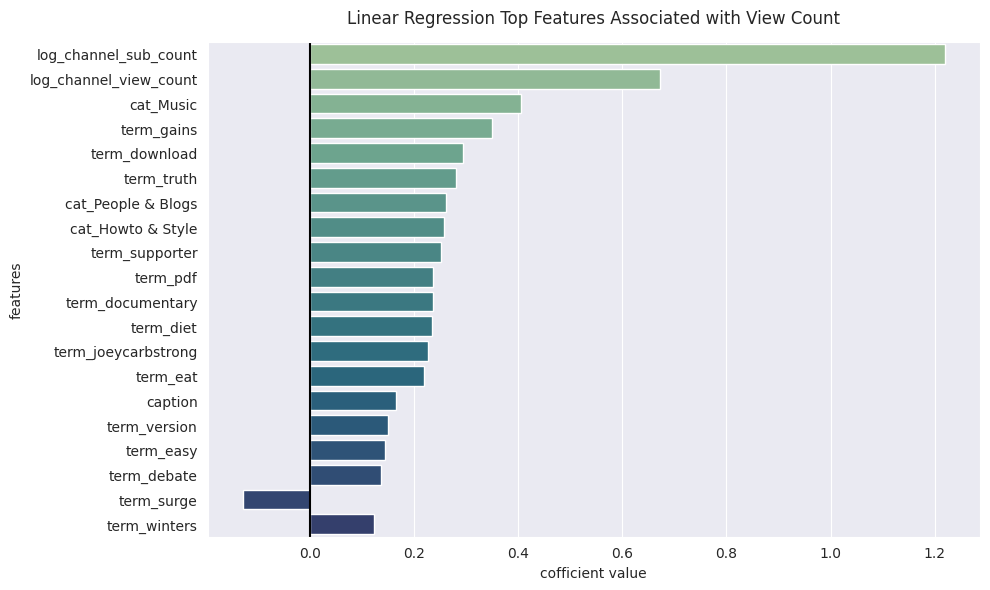

In [45]:
# visualize top feature coefficients
sns.set_style("darkgrid")
plt.subplots(figsize=(10, 6))
sns.barplot(x=top_coef.values, y=top_coef.index, palette="crest", hue=top_coef.index, legend=False, orient="h")
plt.axvline(0, color="black")
plt.title("Linear Regression Top Features Associated with View Count", y=1.02)
plt.ylabel("features")
plt.xlabel("cofficient value")
plt.tight_layout()

# save png
plt.savefig("images/linreg_top_features.png", dpi=300)

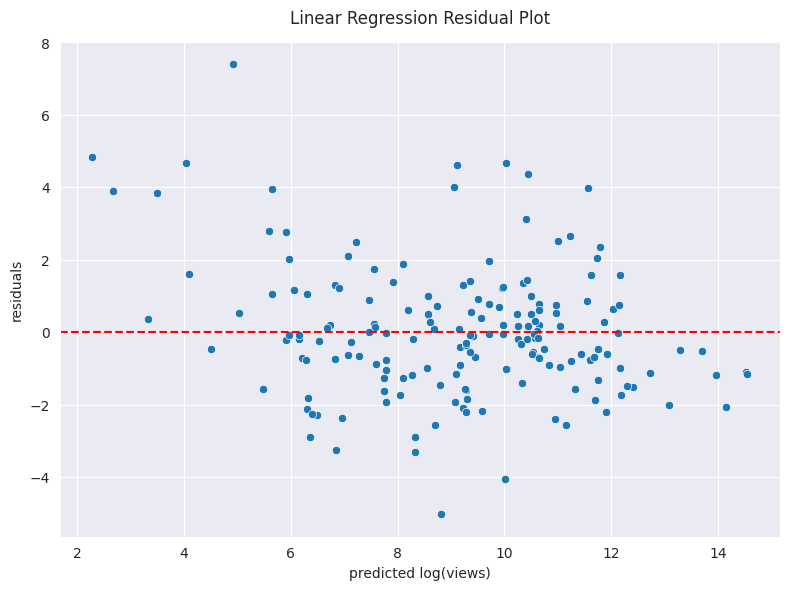

In [12]:
# visualize residuals to look for patterns
residuals = y_test - y_pred
plt.subplots(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("predicted log(views)")
plt.ylabel("residuals")
plt.title("Linear Regression Residual Plot", y=1.02)
plt.tight_layout()

# save png
plt.savefig("images/linreg_residual_plot")

In [38]:
# re-load video dataframe for video information
video_df = pd.read_csv("data/videos_prepared.csv")

# highest sub count videos by highest video view count
video_df["max_view_count"] = video_df["log_view_count"].max()
top_10_sub_count_df = video_df[["channel_title", "title", "log_channel_sub_count", "log_view_count", "max_view_count"]].sort_values(["log_channel_sub_count", "log_view_count"], ascending=False).head(10)
top_10_sub_count_df

,channel_title,title,log_channel_sub_count,log_view_count,max_view_count
35,TEDx Talks,Every Argument Against Veganism | Ed Winters |...,17.581351,14.666177,17.748831
742,TEDx Talks,A Plant-based Diet Changed My Life | Pat McAul...,17.581351,14.356877,17.748831
161,TEDx Talks,The Power of Plant-Based Eating | Dr. Joanne K...,17.581351,13.952898,17.748831
244,TEDx Talks,Why I'm A Vegan | Moby | TEDxVeniceBeach,17.581351,13.467482,17.748831
751,TEDx Talks,The Transformative Power of Raw Vegan Food | R...,17.581351,11.299930,17.748831
100,Big Think,Peter Singer: Animal suffering is human respon...,15.893701,9.951944,17.748831
72,Brut India,Joaquin Phoenix On Why He's Vegan,15.321808,13.765239,17.748831
696,Brut India,Joaquin Phoenix's Powerful Speech on the Envir...,15.321808,9.961945,17.748831
317,Acharya Prashant,"Sir, how did you turn vegan? || Acharya Prashant",14.848695,11.756115,17.748831
175,OxfordUnion,Joey Carbstrong argues that animals are sentie...,14.652759,11.010399,17.748831


In [39]:
# highest channel view count videos by highest video view count
top_10_chan_view_count_df = video_df[["channel_title", "title", "log_channel_view_count", "log_view_count", "max_view_count"]].sort_values(["log_channel_view_count", "log_view_count"], ascending=False).head(10)
top_10_chan_view_count_df

,channel_title,title,log_channel_view_count,log_view_count,max_view_count
35,TEDx Talks,Every Argument Against Veganism | Ed Winters |...,22.860034,14.666177,17.748831
742,TEDx Talks,A Plant-based Diet Changed My Life | Pat McAul...,22.860034,14.356877,17.748831
161,TEDx Talks,The Power of Plant-Based Eating | Dr. Joanne K...,22.860034,13.952898,17.748831
244,TEDx Talks,Why I'm A Vegan | Moby | TEDxVeniceBeach,22.860034,13.467482,17.748831
751,TEDx Talks,The Transformative Power of Raw Vegan Food | R...,22.860034,11.299930,17.748831
72,Brut India,Joaquin Phoenix On Why He's Vegan,22.074043,13.765239,17.748831
696,Brut India,Joaquin Phoenix's Powerful Speech on the Envir...,22.074043,9.961945,17.748831
303,Best Of TRS | English,Why Everyone Must Turn Vegetarian? Monk Explai...,20.649403,14.014606,17.748831
100,Big Think,Peter Singer: Animal suffering is human respon...,20.628524,9.951944,17.748831
588,Fitshortie,What I Eat As A Long-Term Raw Vegan,20.565845,13.971069,17.748831


In [40]:
# highest channel view count videos by highest video view count
top_10_music_df = video_df[["channel_title", "title", "cat_Music", "log_view_count", "max_view_count"]][video_df["cat_Music"] == 1].sort_values("log_view_count", ascending=False).head(10)
top_10_music_df

,channel_title,title,cat_Music,log_view_count,max_view_count
807,AnimalLibOrchVEVO,"ALO (Animal Liberation Orchestra) - Girl, I Wa...",1,13.126331,17.748831
873,blackhole,Los fastidios - Animal liberation,1,12.660553,17.748831
549,Gore Grinder,Animal Liberation Front (ALF) Tribute,1,11.340142,17.748831
567,emilmann23,MOB 47 - Animal Liberation,1,10.803629,17.748831
496,Moby,History of Animal Rights | Moby's Veganniversary,1,10.758839,17.748831
430,consumedmind,Mob 47 - Animal Liberation (at Punk Illegal 2006),1,9.881549,17.748831
565,Clade,Clade - The Animal Liberation (Video),1,9.652330,17.748831
140,Los Fastidios - Topic,Animal Liberation,1,8.904630,17.748831
293,Alex Punx,CONFLICT –Songs for Animal Liberation–,1,7.243513,17.748831
207,禅,Mob 47 - Animal Liberation/Vi Kan (1987 Rehear...,1,7.148346,17.748831


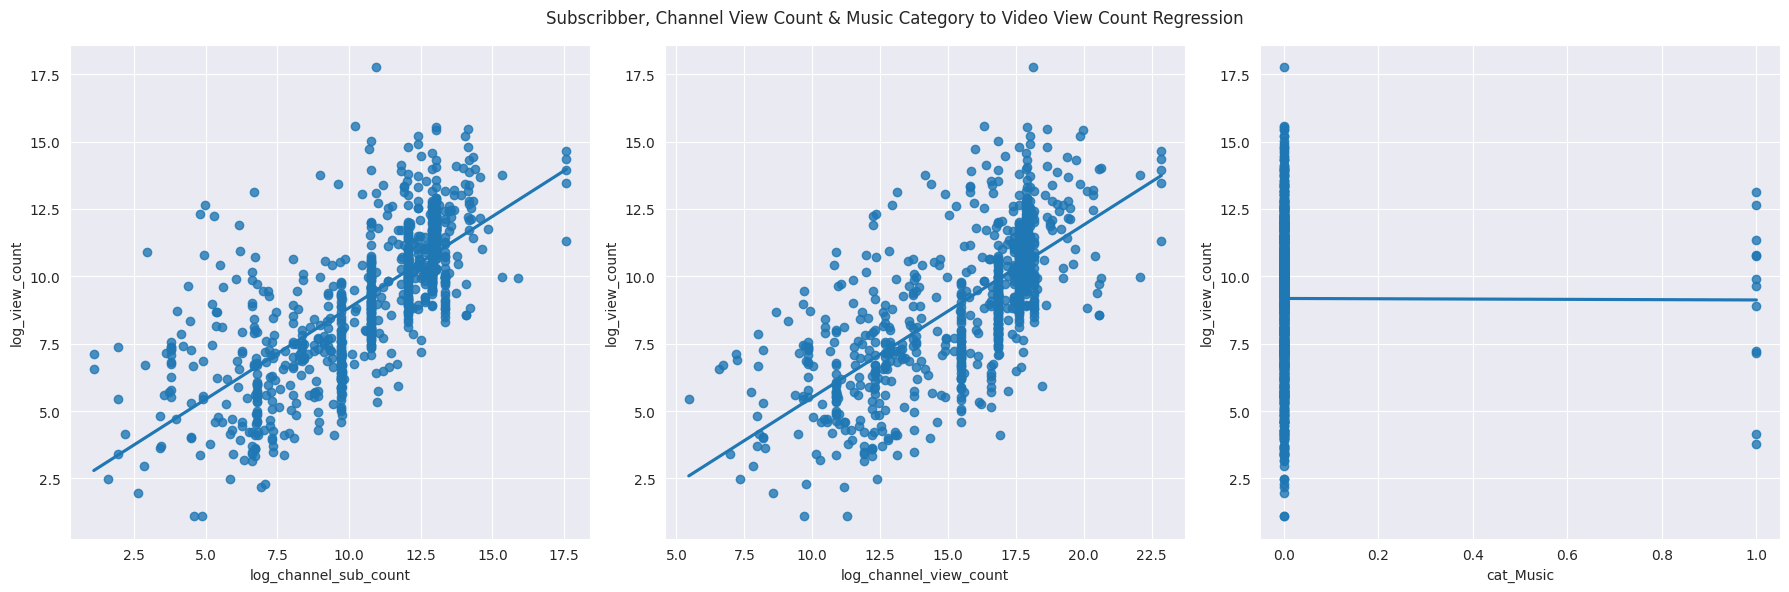

In [43]:
# visualize individual regression lines of coefficients with highest impact on view count
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Subscribber, Channel View Count & Music Category to Video View Count Regression")
sns.regplot(ax=axes[0], data=video_df, x="log_channel_sub_count", y="log_view_count", ci=None)
sns.regplot(ax=axes[1], data=video_df, x="log_channel_view_count", y="log_view_count", ci=None)
sns.regplot(ax=axes[2], data=video_df, x="cat_Music", y="log_view_count", ci=None)
plt.tight_layout()

plt.savefig("images/top_coefficient_regression_lines.png")